# Classification for presence 
### Spa Data set

In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score, classification_report



In [80]:
dt = pd.read_csv('Data/SpaData.csv')
dt.head()

,ID,TimeStamp,Temperature,RelativeHumidity,Light,OxygenLevels,HumidityRatio,GTOccupancy
0,2342,06-02-15 8:51,20.840,19.745000,433.0,629.75,0.003000,1
1,6419,09-02-15 4:49,19.290,26.890000,0.0,466.00,0.003716,0
2,3330,07-02-15 1:20,20.000,18.700000,0.0,435.50,0.002696,0
3,7188,09-02-15 17:38,22.200,38.433333,429.5,1943.50,0.006381,1
4,7655,10-02-15 1:25,20.245,32.900000,0.0,469.00,0.004833,0


In [81]:
dt = dt.drop(['ID','TimeStamp'], axis=1)
dt.shape

(6514, 6)

In [82]:
X = dt.drop(['GTOccupancy'], axis = 1)
Y = dt.GTOccupancy

In [83]:
scale = StandardScaler()
Xscaled = scale.fit_transform(X)

In [84]:
trainX, testX, trainY, testY = train_test_split(Xscaled, Y,test_size= 0.2, random_state= 1234)

In [85]:
params = {
    'weights': ['uniform', 'distance'],
    'metric' : ['minkowski', 'euclidean', 'manhattan']
}
knn = KNeighborsClassifier(n_neighbors=2)

In [86]:
knnGrid = GridSearchCV(estimator= knn, 
             param_grid=params,
             cv=10,
             verbose=1,
             n_jobs=-1)

In [87]:
knnGrid.fit(trainX, trainY)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.1s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=2), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [88]:
knnGrid.best_params_

{'metric': 'minkowski', 'weights': 'distance'}

In [89]:
knnGrid.best_score_

0.9925173369809018

In [90]:
pred = knnGrid.predict(testX)
pd.DataFrame(confusion_matrix(testY, pred))

,0,1
0,1012,4
1,5,282


In [91]:
print(classification_report(testY, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1016
           1       0.99      0.98      0.98       287

    accuracy                           0.99      1303
   macro avg       0.99      0.99      0.99      1303
weighted avg       0.99      0.99      0.99      1303



In [92]:
yhat = knnGrid.predict(testX)

fpr, tpr, threshold = roc_curve(testY, yhat)
Auc = auc(fpr, tpr)



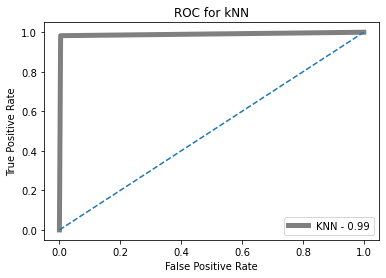

<Figure size 432x288 with 0 Axes>

In [93]:
plt.plot(fpr, tpr, '-', label = 'KNN - %0.2f' %Auc, lw = 5.0, color = 'grey')
plt.plot([0,1],[0,1],'--')
plt.title('ROC for kNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

plt.savefig('Image/ROC.jpg')

In [94]:
dataframe = pd.DataFrame({
                         'Prediction': pred
                        })

### Exporting file to directory

In [95]:
dataframe.to_csv('Data/pred.csv')